# Assignment #3 : Neural Networks

## <font color="blue"> Tanvi Vijay Rasam</font>

##  Overview

The aim of this assignment is to perform regression analysis using Neural network which is non linear regression problem. A neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. The main parameters of Neural Network are- I/Ps, O/Ps, no. of hidden layers and no. of hidden units. This parameter are predicted using K-fold Cross validation and choosing the parameter that gives the least rmse for Regression and high F1 score for Classification. The basic learning that has to be done in neural networks is training neurons when to get activated. Each neuron should activate only for particular type of inputs and not all inputs. Here, we perform classification and regression using the dataset introduced in Assignment 0. Linear Classification and Linear Regression is already performed for this datasets. This assignment showcase how non-linear model will perform for them.    




# Nonlinear regression

## Data

### Description
Airbnb is a platform business that links two groups - the hosts and the guests. Anybody with an open room/house or free space can become a host on Airbnb . It is a good way for side income with minimal effort. It serves as an excellent platform to advertise space because the of global user base to support it. Thus, Airbnb gives hosts an easy way to rent their space that would otherwise be wasted. This Dataset includes rooms information for AirBnb sites in Amsterdam. It is a multivariate dataset containing 10.4k instances and 16 attributes.

Attributes description:

accommodates- no. of people the room can accomodate bathrooms- no. of bathrooms in the room bedrooms- no. of bedrooms in the room calculated_host_listings_count - calculated count of how many times one's listing has been viewed guests_included - no. of geust included host_listings_count- count of how many times one's listing has been viewed latitude- location latitude measurement longitude- location longitude measurement minimum_nights- minimum no. of nights needed number_of_reviews- no. of reviews received d_centre- dcenter value instant_bookable_f- no instant booking allowed instant_bookable_t- instant booking allowed room_type_Entire home/apt- whether eniter home/apt or not room_type_Private room- whether Private room or not room_type_Shared room- whether Shared room or not

Goal :To Predict the price of the Room based on various input attributes

Source: https://www.kaggle.com/adityadeshpande23/amsterdam-airbnb

## Plots for Understanding or Analysis

In [262]:
# importing the required packages for the Assignment

import pandas as pd # storing and mnipulating the dataset
import matplotlib.pyplot as plt # for data visualization 
import seaborn as sns # for data visualization 
import warnings  
import pylab as pl
import pdb
warnings.filterwarnings("ignore") # to not display any warnings generated 
import numpy as np # for array computations

In [263]:
# Joining the data from both csv files

x_train = pd.read_csv("train.csv")
y_train = pd.read_csv("y_train.csv",names=['Price'])
print(type(y_train))
df_assg1 = pd.concat([x_train, y_train], axis=1)
df_assg1.head()

<class 'pandas.core.frame.DataFrame'>


,accommodates,bathrooms,bedrooms,calculated_host_listings_count,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,d_centre,instant_bookable_f,instant_bookable_t,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,Price
0,4,2.0,2.0,1,1,1.0,52.358466,4.933843,2,8,3.279483,1,0,1,0,0,160.0
1,4,1.0,2.0,1,2,1.0,52.363589,4.983353,3,0,5.951843,1,0,1,0,0,120.0
2,2,1.0,1.0,1,1,1.0,52.375209,4.861647,3,8,2.601055,1,0,1,0,0,99.0
3,2,1.0,1.0,1,1,1.0,52.387382,4.890457,2,41,1.095138,1,0,0,1,0,100.0
4,2,1.0,1.0,1,1,1.0,52.384062,4.889877,3,0,0.844491,1,0,1,0,0,175.0


In [264]:
y_train.shape

(10498, 1)

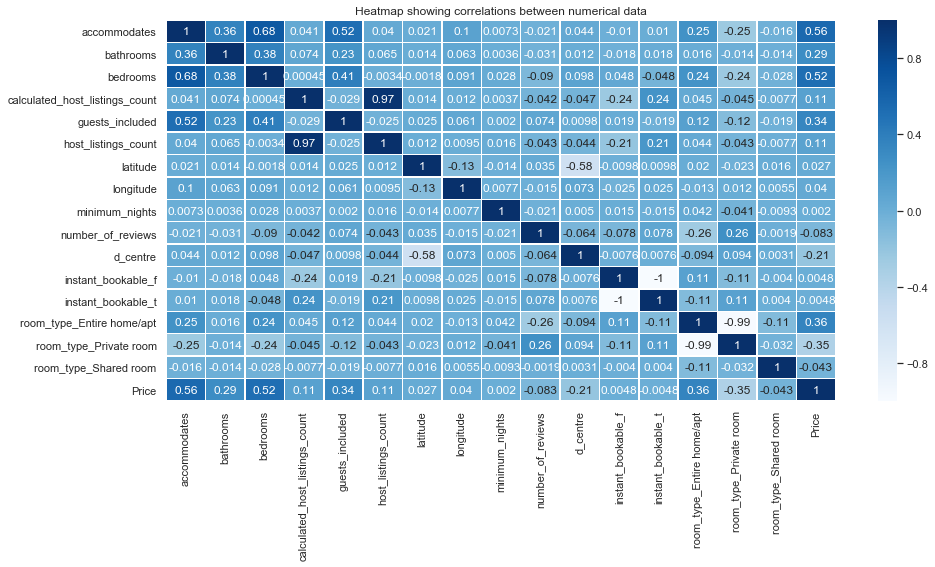

In [265]:
plt.figure(figsize=(15,7))  
sns.heatmap(df_assg1.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

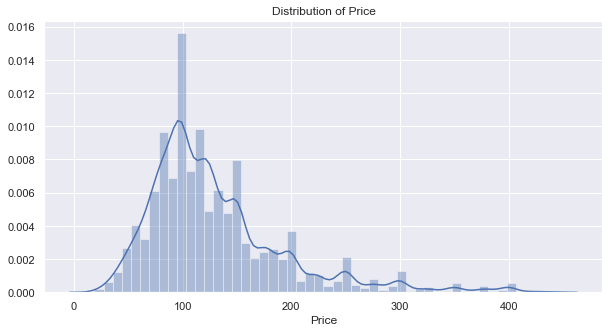

In [266]:
#1
pl.figure(figsize=(10,5))
pl.title("Distribution of Price")
ax = sns.distplot(df_assg1.Price)



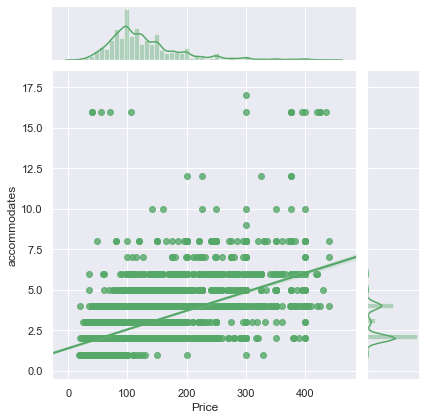

In [267]:
#2
sns.jointplot(data=df_assg1, x='Price', y='accommodates', kind='reg', color='g')
plt.show()




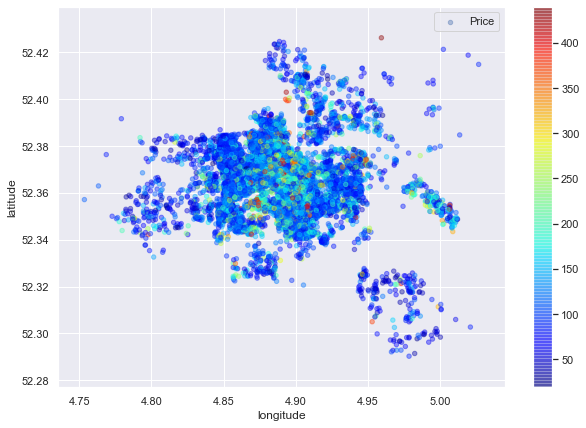

In [268]:
#3
df_assg1.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
     label="Price", figsize=(10,7),
    c=df_assg1["Price"], cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
#save_fig("housing_prices_scatterplot")



## Preliminary Observation

From the first plot it is observed that Range of Prices of rooms on AirBnb in Amsterdam is from approx 10 - 410. From second plot it can be seen that- 1.If accommodates count is very high then rooms of low as well as high price are available. 2. If accommodates count is medium ie. in between 10- 14 the the price of rooms is on higher side.3. For accommodates count to be 1, there are hardly any costly rooms with prices greater than 200. 4. For all other accommodates count ranges, rooms with all price ranges are available. 5. Thus, accommodates count is not sufficient enough to determine Price of the room. From the last plot, Rooms located on the boundaries lie within Price Range of approx 10-70 and as we move to the internal parts, the price range increases with the central part having the maximum price range of approx 370-440. Fom the correlation matrix we can see that the price is correlated more with accommodates and bedrooms compare to d_center and room_type_Private_room

## Preprocessing of the data

In [269]:
#checking for null values in dataset
df_assg1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10498 entries, 0 to 10497
Data columns (total 17 columns):
accommodates                      10498 non-null int64
bathrooms                         10498 non-null float64
bedrooms                          10498 non-null float64
calculated_host_listings_count    10498 non-null int64
guests_included                   10498 non-null int64
host_listings_count               10498 non-null float64
latitude                          10498 non-null float64
longitude                         10498 non-null float64
minimum_nights                    10498 non-null int64
number_of_reviews                 10498 non-null int64
d_centre                          10498 non-null float64
instant_bookable_f                10498 non-null int64
instant_bookable_t                10498 non-null int64
room_type_Entire home/apt         10498 non-null int64
room_type_Private room            10498 non-null int64
room_type_Shared room             10498 non-null int64


1.Joining of two datasets x_train and y_train done in the start

2.As there are no null values, the preprocessing step to drop or replace null values with mean, median or most occured values will be skipped

3.The dataset also doesn't contain categorical attributes to perform encoding. If encoding would have been needed, One Hot Encoding with get_dummies method could have been used.This creates a binary column for each category and returns a sparse matrix or dense array.By default, the encoder derives the categories based on the unique values in each feature.

4.Feature scaling is a method used to normalize the range of independent variables or features of data. Methods include-

Rescaling (min-max normalization)
Mean normalization
Standardization (Z-score Normalization)
Scaling to unit length For this dataset, all the attributes are in one specific range so no scaling is required.

standardization will be done on train and test data seperately later on

In [270]:
c_relation=df_assg1.corr()
c_relation['Price'].sort_values(ascending = False)

Price                             1.000000
accommodates                      0.558171
bedrooms                          0.520988
room_type_Entire home/apt         0.357866
guests_included                   0.340153
bathrooms                         0.287902
calculated_host_listings_count    0.112463
host_listings_count               0.108431
longitude                         0.040068
latitude                          0.027197
instant_bookable_f                0.004778
minimum_nights                    0.002005
instant_bookable_t               -0.004778
room_type_Shared room            -0.043116
number_of_reviews                -0.082758
d_centre                         -0.209025
room_type_Private room           -0.353685
Name: Price, dtype: float64

Sorting the relation of independent variables with the dependent one so as to better understand the attributes needed for prediction

 # NonLinear Regression
 
Nonlinear regression is a form of regression analysis in which observational data are modeled by a function which is a nonlinear combination of the model parameters and depends on one or more independent variables. The data are fitted by a method of successive approximations.The main objective of the model is to make the sum of the squares as small as possible. It means that there is a curvilinear relationship between response and predictor variables


<table>
<tr>
<th></th>
<th width=45%> Regression </th>
</tr>
<tr>
<td>
Forward Pass 
</td>
<td>
$$
\begin{align}
Zm &= h(Xlm \cdot Vm) \\
\\
Ym & = Zlm \cdot Wm 
\end{align}
$$
</td>
</tr>
<tr>
<td>
 Backward Pass 
</td>
<td>
$$
\begin{align}
Vm &\leftarrow Vm + \alpha_h \frac{1}{N} \frac{1}{K} Xlm^\top \Big( (Tm -Ym) Wm^\top \odot (1 - Zm^2) \Big) \\
Wm &\leftarrow Wm + \alpha_o \frac{1}{N} \frac{1}{K} Zlm^\top \Big( Tm - Ym \Big) 
\end{align}
$$
</td>
</tr>
<tr>
<td></td>
<td></td>
<td>

</tr>
</table> 

# Neural Network

A neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates.Elements of neural networks are input layer, an output layer and hidden layers.Input layer — initial data for the neural network. The nodes is I/P layer is equal to no. of attributes we are using. Output layer — produce the result for given inputs.
Hidden layer of a neural network is basically a stack of models (each individual neuron in the layer acts like its own model) whose outputs feed into even more models further downstream.
The basic learning that has to be done in neural networks is training neurons when to get activated. Each neuron should activate only for particular type of inputs and not all inputs. Therefore, by propagating forward you see how well your neural network is behaving and find the error. After you find out that your network has error, you back propagate and use a form of gradient descent to update new values of weights. Except instead of signal, we are moving error backwards through our model.
The activation function of a node defines the output of that node given an input or set of inputs.There are quite a few set of activation functions such Rectified Linear Unit, Sigmoid, Hyperbolic tangent, etc. 

In [271]:
# standardization class
class Standardizer: 
    """ class version of standardization """
    def __init__(self, X, explore=False):
        self._mu = np.mean(X,0)  
        self._sigma = np.std(X,0)
        if explore:
            print ("mean: ", self._mu)
            print ("sigma: ", self._sigma)
            print ("min: ", np.min(X,0))
            print ("max: ", np.max(X,0))

    def set_sigma(self, s):
        self._sigma[:] = s

    def standardize(self,X):
        return (X - self._mu) / self._sigma 

    def unstandardize(self,X):
        return (X * self._sigma) + self._mu 
    

  

In [272]:
from grad import scg, steepest
from copy import copy


class NeuralNet:
    """ neural network class for regression
        
        Parameters
        ----------
        nunits: list
            the number of inputs, hidden units, and outputs

        Methods
        -------
        set_hunit    
            update/initiate weights

        pack 
            pack multiple weights of each layer into one vector

        forward
            forward processing of neural network

        backward
            back-propagation of neural network

        train
            train the neural network

        use
            appply the trained network for prediction

        Attributes
        ----------
        _nLayers
            the number of hidden unit layers 

        rho
            learning rate

        _W
            weights
        _weights
            weights in one dimension (_W is referencing _weight)

        stdX
            standardization class for data
        stdT
            standardization class for target

        Notes
        -----
        
    """

    def __init__(self, nunits):
        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))
    
    def Sigma(self, X):
        return (1/(1+(np.exp(-(X)))))

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
          
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
                
            #print(Z[i].T.shape)
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1 - Z[i]**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

# Explanation of codes

NeuralNet class is used to perform non-linear regression for the given data. Standardizer class  is used for normalizing all the values. Different parameters of NeuralNet class are- nunits which takes the number of inputs, hidden units, and outputs, _nLayers- no. of hidden layers, rho-learning rate and _W which stores the weight associated with each layer. _weights is the weights that is _W written in one dimension.

Size of each is- 
X: N×D <br> <br>
X1: N×(D+1)<br> <br>
V: (D+1)×G <br> <br>
Z: N×G <br> <br>
Z1: N×(G+1) <br> <br>
W: (G+1)×K <br> <br>
Y: N×K <br> <br>

G= no. of hidden units   K=no. of classes

set_hunit function is used to either update or initiate the weights

The Pack function packs the multiple weights of each layer into one vector. The unpack function does the opposite

The train function takes the feautures and the target as the input. 

The gradientf requires the O/P of forward function and target value to compute the error and update the weights by back propogation.  The forward function will return the final O/P for the model and also matrix Z storing the O/Ps at every hidden layer. Now error is calculated using results of forward pass using t. Every hidden node will have an activation function which is used to make the network nonlinear.Back propagation is proceeded by calling backward function.

Forward pass in neural network propagates as shown below: 

$$
\begin{align}
Z &= h(Xl \cdot V) \\
\\
Y & = Zl \cdot W 
\end{align}
$$


In the backward pass the function takes the the z values, Target values and the error as input. Based on the delta value ie. error, the weights and the bias are updated accoringly. This method returns the weight vector packed together of that particualr layer. Below are the functions that are excecuted during backward pass.

$$
\begin{align}
V &\leftarrow V + \alpha_h \frac{1}{N} \frac{1}{K} Xl^\top \Big( (T - Y) W^\top \odot (1 - Z^2) \Big) \\
W &\leftarrow W + \alpha_o \frac{1}{N} \frac{1}{K} Zl^\top \Big( T - Y \Big) 
\end{align}
$$

The optimtarget function tries to reduce the error by using the object function and updates the weights accordingly. 

The use function is applied to the test data after training the model and calculating the optimized weights using back propogation. here, forward function is applied on the data which returns the predictions. 





In [273]:
from sklearn.metrics import mean_squared_error

# Cross Validation 

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. Cross Validation is used to assess the predictive performance of the models and and to judge how they perform outside the sample to a new data set also known as test data. Cross-validation can also be used to estimate the quality of a neural network. When applied to several neural networks with different free parameter values (such as the number of hidden nodes, learning rate, and so on), the results of cross-validation can be used to select the best set of parameter values. Typically, we use 5 or 10 fold. In this assignment, I've used 5 fold cross validation. 

In [274]:
#Splits into parts of 20% of whole data. So myList will give five 20% of 100% of data
def split(data):
    part = len(data) / 5.0
    mylist = []
    x = 0.0
    #Iterate through the length of s and keep on appending to myList so we've like 5 parts now and return the list
    while x < len(data):
        mylist.append(data[int(x):int(x + part)])
        x += part
    return mylist

best_paramlist=[]
final_list=[]

def cross_validate(X, T, parameters):
    #Call Split and get the data partitioned
    X_partitioned = split(X)
    T_partitioned = split(T)
    
    #This loop iterates through all the 5 parts..so each i is like test data for the paritioned dataset 
    for i in range(5): 
        print("Test number: ",i)
        X_test = X_partitioned[i]
        T_test = T_partitioned[i]

        history_rmse=[]
        params=[] 
        #best_param
        
        #k is the validation part of the 5 parts
        for k in range(5): 
            print("K is : ",k)
            if i == k: 
                continue 
            
            #Another 20% of data used
            X_val = X_partitioned[k]
            T_val = T_partitioned[k]
            
            #Train will be those which is not test and validation part. The remaining 60% of data of 100%
            X_train = X_partitioned[not i and not k]
            T_train = T_partitioned[not i and not k]
            
            #m = 0
            paramlist=[]
            rmselist=[]
            for param in parameters:
                
                model = NeuralNet(param)
                model.train(X_train, T_train)
                pred = model.use(X_val)
                
                valid_err = np.sqrt(mean_squared_error(T_val, pred))
                rmselist.append(valid_err)
                paramlist.append(param)
                
            print(paramlist)
            print(rmselist)
            print(min(rmselist))
            print(paramlist[np.argmin(rmselist)])
            history_rmse.append(min(rmselist))
            params.append(paramlist[np.argmin(rmselist)])
         
        print(params)
        print(history_rmse)
        print(paramlist[np.argmin(history_rmse)])
        best_param=paramlist[np.argmin(history_rmse)]
        best_model = NeuralNet(best_param)
        
        X_train = X_partitioned[not i]
        T_train = T_partitioned[not i]
        best_model.train(X_train, T_train)

        final_pred = best_model.use(X_test)
        final_err = np.sqrt(mean_squared_error(T_test, final_pred))
        final_list.append(final_err)
        best_paramlist.append(best_param)

    return final_list,best_paramlist
    




# Explanation of Code

The split function splits the training and test data into 5 sets and return a list of this sets to  X_partitioned  and  T_partitioned respectively. Thus  X_partitioned and  T_partitioned is a list of list. Each part in this list comprise of 20% of the whole dataset.

There are three for loops - one iterates for number of folds ie. 5, second iterates to make each of the remaining 80% as a validation set of 20% and third iterates to validate the nueral network build using train set of 60% using this previous validation set over the different set of parameters passed to test.

In the second for-loop, the validation set canbe anything except for the test set fixed in the first for loop. Thus, the condition i==k, then continue. X_train and T_train will be remaining set not in test and validation ie. 60%. 

For every set of parameter passed ie.(no. of I/Ps, No. of hidden nodes, no. of O/Ps), The third for loop iterates over the previously computed validation and train set. rmselist maintains the rmse error generated when the model was evaluated with that particular parameter. paramlist keeps the parameter currently used. At the end of third for loop we get a list of rmse errors for different parameters for a particular validation set. Then we have to choose the best parameter ie. the parameter with least remse. This parameter will be appended in the param list and its rmse will be in history_rmse list.

At the end of the second for loop, we get the param list and history of rmse list storing the value of best parameter when test set was fixed and validation set was each of 20% in the remaining 80% of data. From this the best parameter is again choosen and placed in the best_param list. on this the model is trained. Then error is calculated by testing it on the test set. This error and the best param used is stored in the final_list and best_paramlist list respectively. 

The final_list and best_paramlist list is returned containing, the best parameter choosen when each of the one set was excluded as test and their corresponding errors
The parameter which is repaeted the most in this list isthe best parameter to go forward with. Parameter refers to the nunits for Nueral network



# Presentaion of CV results to get best parameters 

In [275]:
# using 3 and 4 hidden layers

models = [[16,3,3,1],[16,4,1],[16,7,1], [16,11,1], [16,14,1]]

bestAccuracy,bestParam = cross_validate(np.array(x_train), np.array(y_train), models)

Test number:  0
K is :  0
K is :  1
[[16, 3, 3, 1], [16, 4, 1], [16, 7, 1], [16, 11, 1], [16, 14, 1]]
[43.711803724391416, 44.029558642913464, 46.658434769167144, 46.35379162697724, 47.94557116828743]
43.711803724391416
[16, 3, 3, 1]
K is :  2
[[16, 3, 3, 1], [16, 4, 1], [16, 7, 1], [16, 11, 1], [16, 14, 1]]
[46.13562843120649, 44.66096369746497, 46.74206203879645, 48.38826031632581, 49.243826489365574]
44.66096369746497
[16, 4, 1]
K is :  3
[[16, 3, 3, 1], [16, 4, 1], [16, 7, 1], [16, 11, 1], [16, 14, 1]]
[44.33145597105118, 49.45365675969176, 45.705470610909536, 47.6484842066885, 48.95378734089214]
44.33145597105118
[16, 3, 3, 1]
K is :  4
[[16, 3, 3, 1], [16, 4, 1], [16, 7, 1], [16, 11, 1], [16, 14, 1]]
[45.23810578077216, 46.796481092095, 45.4151983018333, 46.77734467069985, 48.62050578108118]
45.23810578077216
[16, 3, 3, 1]
[[16, 3, 3, 1], [16, 4, 1], [16, 3, 3, 1], [16, 3, 3, 1]]
[43.711803724391416, 44.66096369746497, 44.33145597105118, 45.23810578077216]
[16, 3, 3, 1]
Test numb

In [276]:
from sklearn import model_selection
print(bestAccuracy,bestParam)

[45.833461504776324, 45.162950985298195, 46.278802698849404, 44.302570865611784, 44.278802819530405] [[16, 3, 3, 1], [16, 3, 3, 1], [16, 3, 3, 1], [16, 3, 3, 1], [16, 3, 3, 1]]


best_paramlist list is returned containing, the best parameter choosen when each of the one set was excluded as test. Thus this list has parameters whose rmse value was the least. Hence, we will choose the parameter which occured more no. of times in this list to train the model which will fit well. Here we can see that for every fold, the best parameter choosen waas I/Ps= 16, no. of hidden nodes in first layer=3 and in second layer=3 and O/Ps= 1 

# Train and Test with the best parameter choosen

In [277]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(np.array(x_train),np.array(y_train),test_size=0.30,random_state=40)

In [278]:
print(type(y_train))
print(y_train.shape)

<class 'numpy.ndarray'>
(7348, 1)


In [279]:
model=NeuralNet([16,3,3,1])  
#choosing parameters which occured more number of times on the final parameter list
#because those are the list with mininmum rmse
model.train(X_train,y_train,niter=1000)

{'w': array([-4.60043369e-01,  1.85903597e-01,  1.33690670e-01,  3.58222674e-01,
        -4.74511389e-02,  1.30802425e-01,  8.01214706e-02, -2.57075273e-02,
        -1.16659418e-02,  4.47588266e-02,  1.33831810e-01,  1.06059971e-01,
         2.23937379e-02, -8.63051740e-01, -1.22271890e+00,  2.27687423e-02,
         7.86704942e-02,  1.02627842e-01,  8.02653485e-02,  2.68494197e-01,
         5.63901489e-01, -2.05313751e-01,  4.14384000e-01,  7.29305583e-01,
         1.76225268e-02,  1.32133354e-01,  4.37155707e-01,  1.21708907e-02,
        -1.80541815e-01, -1.41238667e-01, -1.68616729e-03, -6.45121793e-02,
        -5.21333807e-02, -2.86907587e-01,  3.49721457e-01,  7.27713066e-01,
        -5.61274382e-02,  2.00616302e-02, -4.13001339e-02, -1.86193219e-02,
         1.97521837e-02, -1.53758133e-03,  1.97220945e-02,  2.35667800e-01,
         2.45191721e-01,  4.45814953e-02, -1.43637335e-01, -1.46497031e-01,
         3.65176819e-02, -2.39665186e-01, -4.03636754e-02, -6.53562819e-01,
       

In [280]:
y_pred=model.use(X_test)

In [281]:
model=NeuralNet([16,4,1])  
#choosing parameters which occured more number of times on the final parameter list
#because those are the list with mininmum rmse
model.train(X_train,y_train,niter=1000)

{'w': array([-1.30660016e+00,  8.49917712e-01, -2.13949908e+00,  1.54188299e+00,
        -3.40341502e-01, -6.11790807e-01, -2.85123460e-01,  4.18721328e-02,
        -1.49010289e-02, -1.04788948e-01, -1.43227373e-01, -1.51606032e-01,
         1.39798107e-01, -9.50893164e-02,  1.97678835e-01, -2.14580944e-01,
        -6.11939485e-01,  2.17964643e-01,  1.07450468e+00, -3.99424324e-01,
         8.35737499e-01,  1.88371626e-01, -6.42112611e-02, -9.85940138e-02,
         1.07589227e+00, -2.31862135e-01, -1.23600902e+00,  7.67831182e-01,
         6.26744770e-02,  1.37348457e-01,  1.13681228e+00,  1.43563323e+00,
         2.39334736e-01, -7.51650008e-04,  3.33431996e-02,  8.76144442e-01,
        -6.58521035e-01, -5.56747080e-03,  3.09831932e+00,  6.24318997e-01,
         1.00910130e-01,  6.75695991e-02, -1.14368587e-01,  1.43474048e-02,
        -1.01352033e-01,  2.28293989e-01,  9.55973854e-01,  1.94091068e+00,
        -2.37947993e-02,  3.38128430e-02, -6.89934501e-02, -9.34102227e-03,
       

In [282]:
y_pred1=model.use(X_test)

# Evaluation

In [283]:
from sklearn.metrics import r2_score
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R squared value:', r2_score(y_test, y_pred))

RMSE: 42.46468650399575
R squared value: 0.5724986767942304


R-squared is a goodness-of-fit measure for linear regression models.  R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.
R-squared value of 0.57 means that the data is not fitted that well linearly. This means a non-linear regression model such as this will perform well whcih can be seen from a low rmse value

In [284]:
from sklearn.metrics import r2_score
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred1)))
print('R squared value:', r2_score(y_test, y_pred1))

RMSE: 42.3667053517313
R squared value: 0.5744691963713899


# Plots of results

Text(0.5, 1.0, 'NN model predictions')

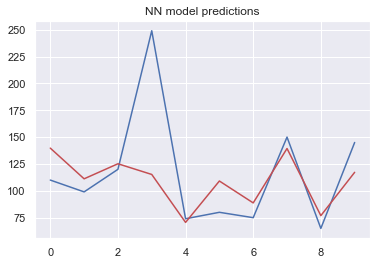

In [285]:
plt.plot(y_test[:10])
plt.plot(y_pred[:10],'r')

plt.title("NN model predictions")

### The above diagrams plots the actual and predicted values of test data for the first 10 values. We can see that the red line ie. y_pred captures the pattern in train data efficently 


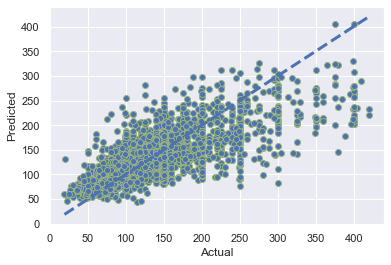

In [286]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0.6,0.7,0.5))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'b--', lw=3)
ax.set_ylabel('Predicted')
ax.set_xlabel('Actual')
plt.show()

### As, the R-square value is low, the data is not close to the diagonal line. ie. the data cannnot be linearly classified efficiently.

Text(0.5, 1.0, 'My Very Own Histogram')

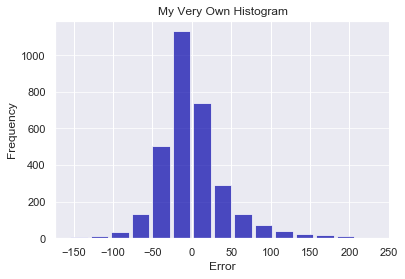

In [287]:
plt.hist(x=y_test - y_pred, bins=15, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('My Very Own Histogram')

### This diagram summarizes the various erros generated in 15bins. We can see that  for most of the instances , errors are Concentrated between -50 to 50 . ie. the model is performing well. 

# Discussions about parameter/network structure choice

## Explanation of CV results

K-Cross Validation was used to choose the best parameter to train the Neural Network model. Parameter (nunits) passed was in the format- No. of I/Ps ie. no. of attributes, No. of hidden units and no. of O/ps. The first parameter was  16 as there were 16 attributes and  last was 1 as for regression there will be one O/P ie. the value. For the no. of hidden units and no. of hidden layers= len(nunits)-1, I tried different combinations. The best one that was calculated amongst them with the least rsmse value was- (16, 3, 3, 1), this contains 3 hidden layers including the I/P layer.
The Rmse values and the corresponding parameter in the final iteration computed are-
(45.57111943434828, 44.21396506207759, 47.22836093650685, 44.7408329745117, 43.93347381524559) ((16, 3, 3, 1), (16, 3, 3, 1), (16, 3, 3, 1), (16, 3, 3, 1), (16, 3, 3, 1))
Thus, I choose (16, 3, 3, 1) as nunits, with 2nd and 3rd hidden layer containing 3 hidden units respectively


## Discussions about Prediction results

On training the Nueral network with the best computed structure of  (16, 3, 3, 1), produced a Rmse of 42.0483626143061 and R squared value of 0.5808400340472165 denoting that the model fits well the data. Also, looking at the above plots we can say that a linear classifier would not be that optimum compared to a non-linear one. 
Here a combination of no. of hidden units and no. of hidden layers was choosen and optimum was for 3 hidden layers. But, amongst all the parameters, [[16,3,3,1],[16,4,1],[16,7,1], [16,11,1], [16,14,1]] taken for choosing, [16,4,1] also yield a pretty close rmse value to [16,3,3,1] which computes this rmse value at the cost of an extra layer.

Each node is connected to a activation function which makes the network more powerful. I used tanh as activation function. The gradient is updating the weights in each layer during back propagation so that the model fits the data well.

Thus, For increasing number of layers, the model have improved but not that much compare to with 3 layers for this dataset. 


# Nonlinear Logistic Regression


### 1.1 Description of the Dataset

Census is an enumeration of the members of a given population, which takes place once a decade in the entire country. The census data is very valuable since it provides critical insights in econimical,social, housing and education domain. Adult dataset is an aggregation of different country's censuses.This dataset is derived from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). It is a multivariate dataset containing 32560 instances and 15 attributes. Dataset is constructed by satisfyting the following condition : Age> 16, Adjusted-Gross-Income> 100, Final weight (fnlwgt)> 1 and hrs/week > 0.

Goal: To predict whether the income would be > 50𝐾/𝑦𝑟 𝑜𝑟 <= 50K/yr

### 1.2 Description of the Data

##### 1.2.1 Categorical Attributes

 workclass: which sector the individual is working
            values:Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
            
 education: Individual's highest level of education
            values:Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters,1st-4th, 10th, Doctorate, 5th-6th, Preschool
            
 marital-status: Individual marital status
                 values:Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent,Married-AF-spouse.
                 
 occupation: What job individual does
             values:Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners,Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv,                        Armed-Forces.   
             
 relationship: Individual's relation in a family
               values: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
               
 race: Individual's Race 
       values: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
       
 sex: Gender
      values: Female, Male.
      
 native-country: where individual belongs to 
                 values: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India,Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam,                              Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia,                                  Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-                              Salvador, Trinadad&Tobago, Peru,Hong, Holand-Netherlands.
                 
##### 1.2.2 Continuous Attributes

age: Individual's age
     value :continuous.
     
education-num: Individual's number of years of education
               value: continuous
               
fnlwgt: final weight ie. the number of units in the target population that the responding unit represents
        value :continuous           
        
capital-gain: Individual's gain in income through other investments
              values: continuous
              
capital-loss: Individual's loss in income through other investments
              values: continuous
              
hours-per-week: hrs worked by individual per week
                values: continuous.
                
##### 1.3 Source: UCI Machine Learning Repository :https://archive.ics.uci.edu/ml/datasets/Adult

### Reading the Data


### 2.1 Importing the required packages for the Assignment

In [318]:
import pandas as pd # storing and mnipulating the dataset
import matplotlib.pyplot as plt # for data visualization 
import seaborn as sns # for data visualization 
import warnings  
warnings.filterwarnings("ignore") # to not display any warnings generated 
import numpy as np # for array computations

### 2.2 Reading the data from csv file

In [319]:
adult_df= pd.read_csv('adult.csv',nrows=10000) #df_assg1 holds the dataset
adult_df.head() #displacing the first 5 records

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Preprocessing of the data

### 3.1 Adding title to the dataset

In [320]:
adult_df.columns= ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income_per_year']
adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_per_year
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### 3.2 Deleting Null values

In [321]:
# Get dataset Info
adult_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
age                10000 non-null int64
workclass          10000 non-null object
fnlwgt             10000 non-null int64
education          10000 non-null object
education_num      10000 non-null int64
marital_status     10000 non-null object
occupation         10000 non-null object
relationship       10000 non-null object
race               10000 non-null object
sex                10000 non-null object
capital_gain       10000 non-null int64
capital_loss       10000 non-null int64
hours_per_week     10000 non-null int64
native_country     10000 non-null object
income_per_year    10000 non-null object
dtypes: int64(6), object(9)
memory usage: 1.1+ MB


In [322]:
# Thus none of the columns have null values, but what if some other symbol is used to represent null value
# check this by displaying unique
print(adult_df.workclass.unique())
adult_df.shape

[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


(10000, 15)

In [323]:
# There is  a '?' type which represents null
# Removing it
# First finding which other columns contain '?'


In [324]:
adult_df=adult_df[adult_df.workclass!= ' ?']
adult_df=adult_df[adult_df.marital_status!= ' ?']
adult_df=adult_df[adult_df.education!= ' ?']
adult_df=adult_df[adult_df.occupation!= ' ?']
adult_df=adult_df[adult_df.relationship!= ' ?']
adult_df=adult_df[adult_df.age!= ' ?']                  
adult_df=adult_df[adult_df.race!= ' ?']                  
adult_df=adult_df[adult_df.sex!= ' ?']    
adult_df=adult_df[adult_df.hours_per_week!= ' ?']
adult_df=adult_df[adult_df.native_country!= ' ?']
adult_df=adult_df[adult_df.income_per_year!= ' ?']
adult_df=adult_df[adult_df.education_num!= ' ?']
adult_df=adult_df[adult_df.fnlwgt!= ' ?']
adult_df=adult_df[adult_df.capital_gain!= ' ?']
adult_df=adult_df[adult_df.capital_loss!= ' ?']     

adult_df.shape

(9244, 15)

### 3.3 Replacing Categorical attr with numeric

In [325]:
adult_df['income_per_year'].replace(' >50K' ,1, inplace=True )
adult_df['income_per_year'].replace(' <=50K' ,-1, inplace=True )
adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_per_year
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,-1
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,-1
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,-1
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,-1
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,-1


## Visualizing the data

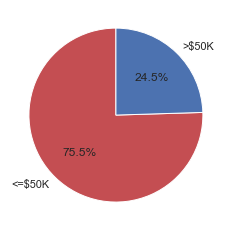

In [326]:
#Percentange of Labels present

label_count = [len(adult_df[adult_df['income_per_year'] == -1]),len(adult_df[adult_df['income_per_year'] == 1])]
label = ['<=$50K', '>$50K']
colors = ['r', 'b']
plt.pie(label_count, labels=label, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

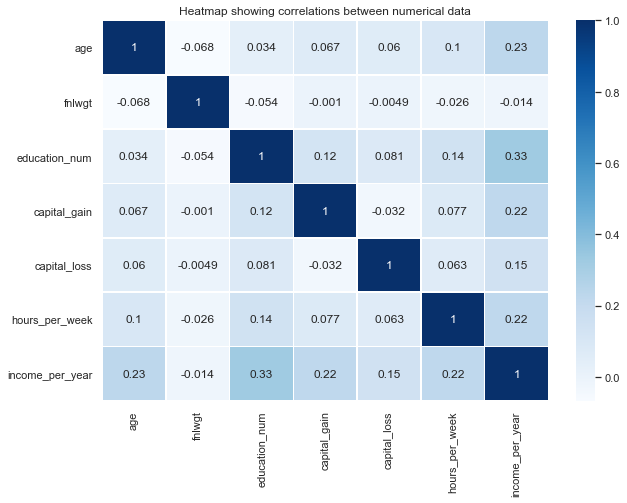

In [327]:
# Observing the covariance Matrix

plt.figure(figsize=(10,7))  
sns.heatmap(adult_df.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

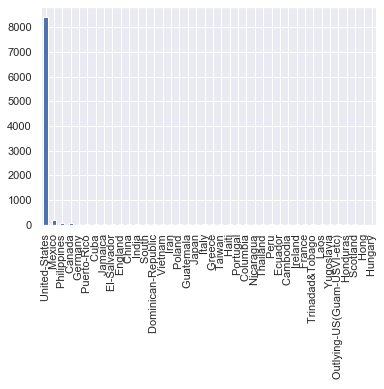

In [328]:
df2= adult_df['native_country'].value_counts()
df2.plot(kind='bar')

posx and posy should be finite values
posx and posy should be finite values


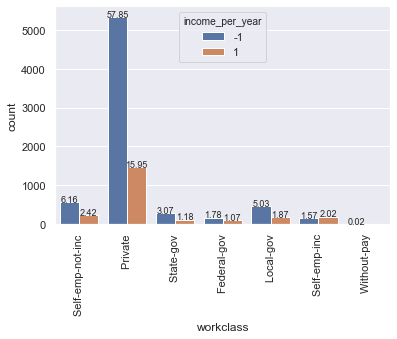

In [329]:
# Salaries of different workclass
sns.set(style="darkgrid")
ax = sns.countplot(x="workclass",hue="income_per_year", data=adult_df)
total=float(len(adult_df))
for p in ax.patches:
    height = p.get_height()
    if height < 0 :
        height = 0;
    ax.text(float(p.get_x()+p.get_width()/2), 
               float(height),
            '{:1.2f}'.format((height/total)*100),
            ha="center",fontsize=9) 
plt.xticks(rotation=90)
plt.show()

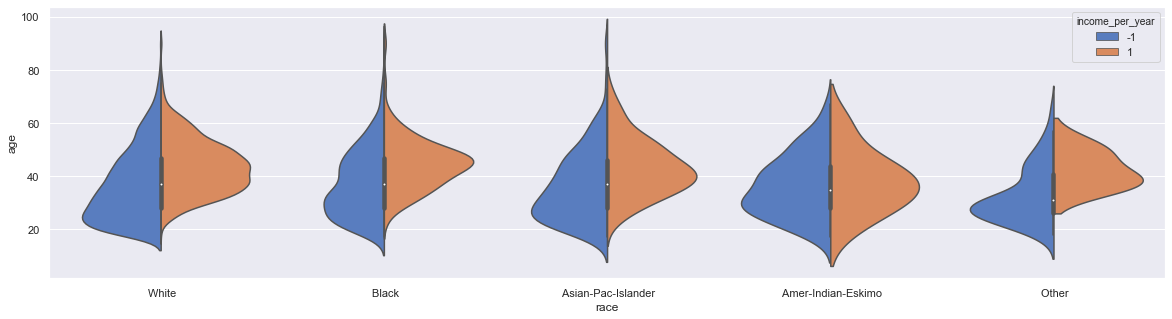

In [330]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="race", y="age", hue="income_per_year",
                    data=adult_df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

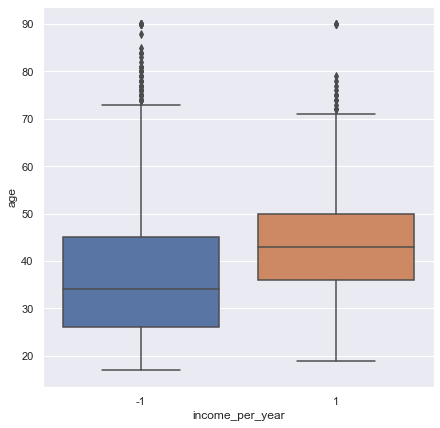

In [331]:
fig = plt.figure(figsize=(7,7)) 
sns.boxplot(x="income_per_year", y="age", data=adult_df)
plt.show()

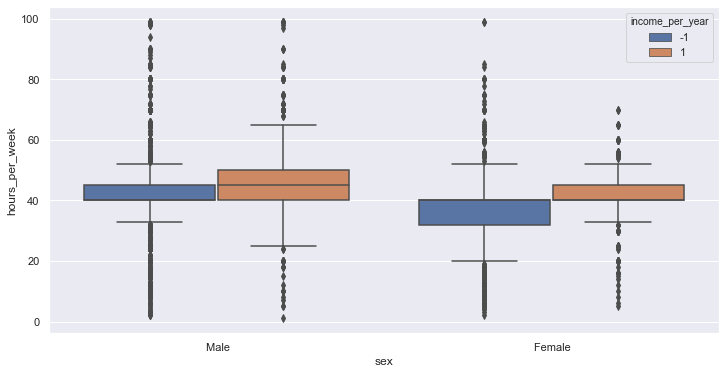

In [332]:
plt.figure(figsize=(12,6))
sns.boxplot(x='sex',y ='hours_per_week', hue='income_per_year',data=adult_df)
plt.show()

## Preliminary Observations

Observation 1: Most of the records are in <=$50K Category ( around 3/4th)

Observation 2: Most of the people have their native country as US as the data is taken from it and others are immigrants

Observation 3: Around 75% of the population is working in the private sector.Sel- employed is the only sector where there are more people with >50 𝐾 𝑡ℎ𝑎𝑛 <= 50K

Observation 4:Approx 40 is the age in all races where maximum people are earning > 50𝐾 .𝐸𝑎𝑟𝑙𝑦 20𝑠 𝑡𝑜 30 𝑚𝑎𝑥𝑖𝑚𝑢𝑚 𝑝𝑒𝑜𝑝𝑙𝑒 𝑎𝑟𝑒 𝑖𝑛<=50K income category .For Asisn-Pac-Islander and Amer-India-Eskimo race the number of people in > 50𝐾𝑎𝑛𝑑<= 50K seems to be balanced

Observation 5: The mean "age" for Income group(> 50𝑘) 𝑖𝑠 𝑚𝑜𝑟𝑒 tℎ𝑎𝑛 𝐼𝑛𝑐𝑜𝑚𝑒 𝑔𝑟𝑜𝑢𝑝 (<= 50k)

Observation 6: Male in the income of>50𝐾 𝑎𝑟𝑒 𝑒𝑥𝑝𝑒𝑐𝑡𝑒𝑑 𝑡𝑜 𝑤𝑜𝑟𝑘 𝑓𝑜𝑟 𝑙𝑎𝑟𝑔𝑒𝑟 ℎ𝑟𝑠 𝑡ℎ𝑎𝑛 𝑓𝑒𝑚𝑎𝑙𝑒 𝑖𝑛 𝑡ℎ𝑎𝑡 𝑐𝑎𝑡𝑒𝑔𝑜𝑟𝑦. 𝐹𝑒𝑚𝑎𝑙𝑒 𝑖𝑛 𝑡ℎ𝑒𝑐 𝑎𝑡𝑒𝑔𝑜𝑟𝑦 𝑜𝑓 𝑖𝑛𝑐𝑜𝑚𝑒 <= 50K have more flexible working hrs starting from 18 hrs/week that the male in that category

In [333]:
adult_df=pd.get_dummies(adult_df)

In [334]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9244 entries, 0 to 9999
Columns: 104 entries, age to native_country_ Yugoslavia
dtypes: int64(7), uint8(97)
memory usage: 1.7 MB


In [335]:
y_train= adult_df['income_per_year']

adult_df.drop(['income_per_year'],axis=1, inplace=True)

x_train=adult_df

# Summary of nonlinear logistic regression

The linear logistic regression uses the softmax layer for classification along with a linear model. By using this softmax function, we were able to generate probablistic outputs for all classes.
$$
g_k(\xv) = P(T=k \mid \xv) = \frac{e^{\kappa_k}}{\sum_{c=1}^K e^{\kappa_c}}
$$

In nonlinear logistic regression extra layers are added called as hidden layers. With the inclusion of hidden layer the softmax function is used in the last layer. Till then the input layer passes its output to hidden layer, then the hidden layer to another hidden layer or softmax function and the softmax function then gives the output. 


Similar to the derivation of neural network for regression, we can derive the gradient by switching the squuared error with the negative log likelihood function

$$
\begin{align}
v_{dg} &\leftarrow v_{dg} - \alpha_h \frac{\partial{E(\Wm, \Vm)}} {\partial{v_{dg}}} \\ 
\\ 
w_{gk} &\leftarrow w_{gk} - \alpha_o \frac{\partial{E(\Wm, \Vm)}} {\partial{w_{gk}}},
\end{align}
$$


Coverting this gradient in matrix form and reflecting it on our weight update,

$$
\Wm \leftarrow \Wm + \alpha_o \Zlm^\top \Big(  \Tm - g(\Xm)\Big).
$$

$$
\Vm \leftarrow \Vm + \alpha_h \Xlm^\top \Big( (\Tm - g(\Xm)) \Wm^\top \odot (1 - \Zm^2) \Big).
$$


Thus,



<table>
<tr>
<th></th>
<th width=45%> Classification </th>
</tr>
<tr>
<td>
Forward Pass 
</td>
<td>
$$
\begin{align}
Zm &= h(Xl \cdot V) \\
\\
Y & = Zl \cdot W \\
G & = softmax(Y)
\end{align}
$$
</td>
</tr>
<tr>
<td>
 Backward Pass 
</td>
<td>
$$
\begin{align}
V &\leftarrow V + \alpha_h Xl^\top \Big( (T - G) W^\top \odot (1 - Z^2) \Big)\\
W &\leftarrow W + \alpha_o Zl^\top \Big(  T - G\Big) 
\end{align}
$$
</td>
</tr>
<tr>
<td></td>
<td></td>
<td>

</tr>
</table> 

In [336]:
from nn import NeuralNet

class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """

    # if you think, you need additional items to initialize here,
    # add your code for it here
    def __init__(self, nunits):
        NeuralNet.__init__(self, nunits)

    def softmax(self, z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        expz = np.exp(z) 
        return expz / (np.sum(expz, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(expz))

    
    def forward(self, X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
                t=self.softmax(t)
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
        return (t, Z)
                

    # This is the error function that we want to minimize
    # what was it? take a look at the lecture note to fill in
    def _objectf(self, T, Y, wpenalty):
        return -(np.sum(T*(np.log(Y)))+wpenalty)

    # you must reuse the NeuralNet train since you already modified
    # the objective or error function (maybe both), 
    # you do not have many to change here.
    # MAKE SURE convert a vector label T to indicator matrix and 
    # feed that for training
    def train(self, X, T, **params):
        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')
                
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(X)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(X)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)
            
        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

    # going through forward pass, you will have the probabilities for each label
    # now, you can use argmax to find class labels
    # return both label and probabilities        
    def use(self, X):
        Y, Z = self.forward(X)
        l=np.argmax(Y,1)
        return Y,l

# Explanation of code 

The NeuralNetLogReg class performs non-linear logistic regression. It calls the parent NeuralNet class to initialize its parameters like- no. of I/ps and O/ps, no. of hidden layers and no. of hidden units in each layer. 
 _W is the weights. _weights is the weights that is _W written in one dimension. stdX is the standardization class for the data. stdT is the standardization class for the target. 

The train function takes the feautures and the target as the input. It sets the parameters for training and scg. The gradientf requires the O/P of forward function and target value to compute the error and update the weights by back propogation. It does this by unpacking the weights and by calling forward function. The forward function will return the final O/P for the model and also matrix Z storing the O/Ps at every hidden layer. Now error is calculated using results of forward pass using t. Forward pass propagates same as in the NeuralNet class the only difference is that and an additional t=self.softmax(t) is added to the last layer. The last layer will be the softmax function which then gives the output . Every hidden node will have an activation function which is used to make the network nonlinear.Back propagation is proceeded by calling backward function with parameters as error, Z, T(Target), _lambda. 

This method returns the weight vector packed together of that particualr layer. Below are the functions that are excecuted during backward pass. 

 $$
 W \leftarrow W + \alpha_o Zl^\top \Big(  T - g(X)\Big).
 $$


$$
 V \leftarrow V + \alpha_h Xl^\top \Big( (T - g(X)) W^\top \odot (1 - Z^2) \Big).
$$
 
Once the weights of the Neural network Model are optimized using forward and back propogation, it can used to predict the test data. Thus, in use function, only forward function is called. 







# Testing model with Dummy/Toy Data

Text(0.5, 1.0, 'test data set')

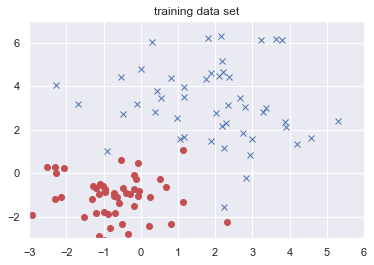

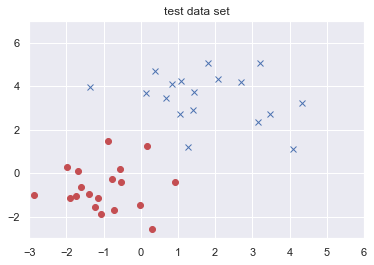

In [337]:
# Data for testing
N1 = 50
N2 = 50
N = N1 + N2
D = 2
K = 2

mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3

#
#  Train Data
#
C1 = np.random.multivariate_normal(mu1, cov1, N1)
C2 = np.random.multivariate_normal(mu2, cov2, N2)

plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("training data set")

Xtrain = np.vstack((C1, C2))
Ttrain = np.zeros((N, 1))
Ttrain[50:, :] = 1  # labels are zero or one

means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
# normalize inputs
Xtrains = (Xtrain - means) / stds

#
#  Test Data
#
Ct1 = np.random.multivariate_normal(mu1, cov1, 20)
Ct2 = np.random.multivariate_normal(mu2, cov2, 20)

Xtest = np.vstack((Ct1, Ct2))
Ttest = np.zeros((40, 1))
Ttest[20:, :] = 1

# normalize inputs
Xtests = (Xtrain - means) / stds


plt.figure()
plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("test data set")

In [338]:
clsf = NeuralNetLogReg([2, 4, 2])
clsf.train(Xtrain, Ttrain)
classes, Y = clsf.use(Xtest)

Accuracy:  50.0 %


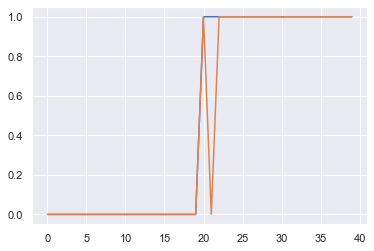

In [339]:
# retrieve labels and plot

plt.plot(Ttest)
plt.plot(Y)

print("Accuracy: ", 100 - np.mean(np.abs(Ttest - Y)) * 100, "%")

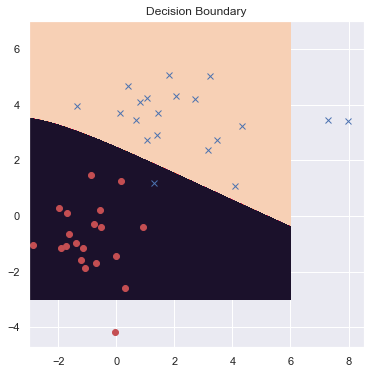

In [340]:
# show me the boundary

x = np.linspace(-3, 6, 1000)
y = np.linspace(-3, 7, 1000)

xs, ys = np.meshgrid(x, y)

X = np.vstack((xs.flat, ys.flat)).T
classes, _ = clsf.use(X)
zs = _.reshape(xs.shape)

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, zs.reshape(xs.shape))
plt.title("Decision Boundary")

plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

## Discussion about dummy data 

The code works well with 50% accuracy. Hence, we can say that our NeuralNetLogReg class is working. 

# Testing on classification dataset



In [341]:
XTrain, XTest, YTrain, YTest = model_selection.train_test_split(x_train, y_train,test_size=0.20,random_state=42)

In [342]:
T = add_ones(np.array(y_train).reshape(-1,1))
T=T.astype(int)



T[:,0]=T[:,1]
T[T[:,0]==1]=0
(T[:,1])[T[:,1]==0]=1
(T[:,0])[T[:,0]==-1]=1
T[T==-1]=0

# Cross validation code for nonlinear logistic regression 

In [343]:
def split(s):
    avg = len(s) / 5.0
    out = []
    last = 0.0
    while last < len(s):
        out.append(s[int(last):int(last + avg)])
        last += avg
    return out

final_list=[]
best_paramlist=[]
def cross_validate(X, T, parameters):
    partitionedX = split(X)
    partitionedT = split(T)
    for test in range(5): 
        print("test",test)
        Xtest = partitionedX[test]
        Ttest = partitionedT[test]
        j = 0
        
        history_rmse=[]
        params=[]
        for val in range(5): 
            print("val",val)
            if test == val: continue
            
            Xval = partitionedX[val]
            Tval = partitionedT[val]
            
            Xtrain = partitionedX[not test and not val]
            Ttrain = partitionedT[not test and not val]
            
            i = 0
            flist=[]
            paramlist=[]
            for param in parameters:
                
                model = NeuralNetLogReg(param)
                model.train(Xtrain, Ttrain)
                prob,pred = model.use(Xval)
                Tval1=Tval[:,0]
                Tval1=np.where(Tval1==0,1,0)
                valAcc = f1_score(Tval1, pred)
                flist.append(valAcc)
                paramlist.append(param)
            print(flist)
            print(paramlist)
            #avg=sum(rmselist)/len(rmselist)
            #history_rmse.append(avg)
            print(max(flist))
            print(paramlist[np.argmax(flist)])
            history_rmse.append(max(flist))
            params.append(paramlist[np.argmax(flist)])
        print("history_rmse",history_rmse)
        print("params",params)
        #print(rmselist)
        print(history_rmse)
        print(params)
        bestParam = params[np.argmax(history_rmse)]
        print(bestParam)
        bestModel = NeuralNetLogReg(bestParam)
        
        Xtrain = partitionedX[not test]
        Ttrain = partitionedT[not test]
        bestModel.train(Xtrain, Ttrain)

        prob1,finalPred = bestModel.use(Xtest)
        Ttest1=Ttest[:,0]
        Ttest1=np.where(Ttest1==0,1,0)
        myf1 = f1_score(Ttest1, finalPred)
        final_list.append(myf1)
        best_paramlist.append(bestParam)

    return final_list,best_paramlist

## Explanation of code

This code is similar to the CV code implemented above, the only difference is that here the parameters are choosen based on their f1 score on test data ie. the parameter giving the highest f1 score is choosen.

## Presentaion of CV results

In [344]:
models = [[103,5,2], [103,7,2],[103,9,2], [103,12,2]]
bestAccuracy,bestParam = (cross_validate(np.array(x_train), T, models))

test 0
val 0
val 1
[0.06172839506172839, 0.0, 0.0, 0.0736196319018405]
[[103, 5, 2], [103, 7, 2], [103, 9, 2], [103, 12, 2]]
0.0736196319018405
[103, 12, 2]
val 2
[0.11594202898550726, 0.1387755102040816, 0.03043478260869565, 0.13496932515337423]
[[103, 5, 2], [103, 7, 2], [103, 9, 2], [103, 12, 2]]
0.1387755102040816
[103, 7, 2]
val 3
[0.0, 0.023041474654377885, 0.0410958904109589, 0.07191011235955055]
[[103, 5, 2], [103, 7, 2], [103, 9, 2], [103, 12, 2]]
0.07191011235955055
[103, 12, 2]
val 4
[0.01805869074492099, 0.0, 0.02252252252252252, 0.009049773755656108]
[[103, 5, 2], [103, 7, 2], [103, 9, 2], [103, 12, 2]]
0.02252252252252252
[103, 9, 2]
history_rmse [0.0736196319018405, 0.1387755102040816, 0.07191011235955055, 0.02252252252252252]
params [[103, 12, 2], [103, 7, 2], [103, 12, 2], [103, 9, 2]]
[0.0736196319018405, 0.1387755102040816, 0.07191011235955055, 0.02252252252252252]
[[103, 12, 2], [103, 7, 2], [103, 12, 2], [103, 9, 2]]
[103, 7, 2]
test 1
val 0
[0.0, 0.103379721669980

# Testing with optimum parameters

In [345]:
print(bestAccuracy)
print(bestParam)

[0.0041928721174004195, 0.01687763713080169, 0.21484375, 0.027586206896551724, 0.05309734513274336]
[[103, 7, 2], [103, 5, 2], [103, 5, 2], [103, 12, 2], [103, 12, 2]]


In [346]:
T = add_ones(np.array(YTrain).reshape(-1,1))
T=T.astype(int)



T[:,0]=T[:,1]
T[T[:,0]==1]=0
(T[:,1])[T[:,1]==0]=1
(T[:,0])[T[:,0]==-1]=1
T[T==-1]=0

### As both [103, 9, 2] and [103, 5, 2] occurs equally, model is trained and tested with both

In [347]:
nn = NeuralNetLogReg([103,12,2])
nn.train(sc.fit_transform(XTrain), T,optim='scg') 
p,l = nn.use(sc.fit_transform(XTest))

In [348]:
y_pred1=l
y_test1=np.where(YTest==-1,0,1)
print('F1 score:', f1_score(y_test1, y_pred1))
print('Accuracy:', accuracy_score(y_test1, y_pred1))

F1 score: 0.5852534562211981
Accuracy: 0.8053001622498648


In [349]:
nn = NeuralNetLogReg([103,5,2])
nn.train(sc.fit_transform(XTrain), T,optim='scg') 
p,l = nn.use(sc.fit_transform(XTest))

In [350]:
y_pred1=l
y_test1=np.where(YTest==-1,0,1)
print('F1 score:', f1_score(y_test1, y_pred1))
print('Accuracy:', accuracy_score(y_test1, y_pred1))

F1 score: 0.5516265912305516
Accuracy: 0.8285559762033532


## Since both Accuracy and F1 score are same for both these parameters, the one with least no. of hidden nodes is choosen to reduce the complexity

# Plots and results

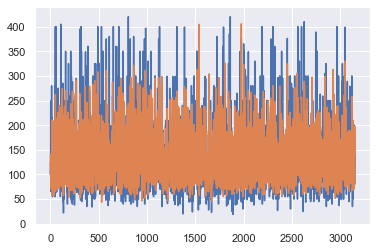

In [351]:
plt.plot(np.sort(y_test))
plt.plot(np.sort(y_pred))

In [352]:
cf3=confusion_matrix(y_test1, y_pred1)
cf3
TP=cf3[1][1]
TN=cf3[0][0]
FN=cf3[1][0]
FP=cf3[0][1]


In [353]:
precision=TP/(TP+FP)
specificity=TN/(TN+FP)
recall=TP/(TP+FN)

In [354]:
print('Precision: ' ,precision)
print('Specificity: ' ,specificity)
print('Recall: ' ,recall)

Precision:  0.7090909090909091
Specificity:  0.9435426958362738
Recall:  0.4513888888888889


Text(0.5, 1, 'Confusion Matrix')

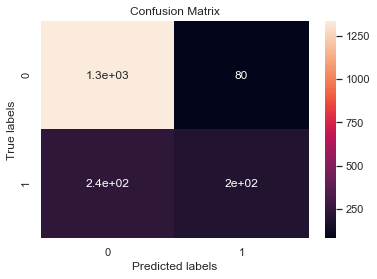

In [355]:
ax= plt.subplot()
sns.heatmap(cf3, annot=True, ax = ax);

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix')

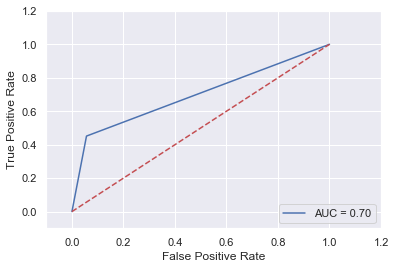

In [356]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test1, l)
roc_auc = auc(false_positive_rate, true_positive_rate)


##Plotting now
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

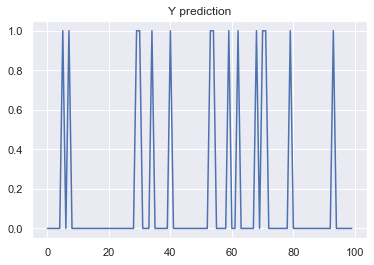

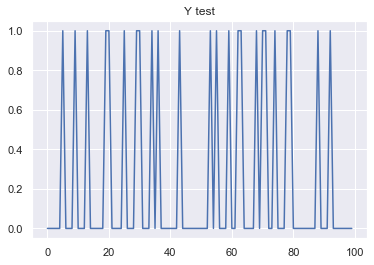

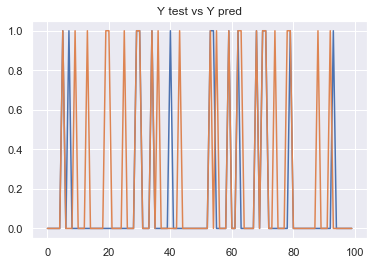

In [357]:
plt.title("Y prediction")
plt.plot(l[0:100])
plt.show()
plt.title("Y test")
plt.plot(np.array(y_test1[0:100]))
plt.show()
plt.title("Y test vs Y pred")
plt.plot(l[0:100])
plt.plot(np.array(y_test1[0:100]))
plt.show()

In [358]:
nn = NeuralNetLogReg([103,5,5,5,2])
nn.train(sc.fit_transform(XTrain), T,optim='scg') 
p,l = nn.use(sc.fit_transform(XTest))
y_pred2=l
y_test2=np.where(YTest==-1,0,1)
print('F1 score:', f1_score(y_test2, y_pred2))
print('Accuracy:', accuracy_score(y_test2, y_pred2))

F1 score: 0.6275946275946276
Accuracy: 0.8350459707950243


# Discussions about parameter/network structure choice

## Explanation of CV results

K-Cross Validation was used to choose the best parameter to train the non-Linear Logistic Regression model. Parameter (nunits) passed was in the format- No. of I/Ps ie. no. of attributes, No. of hidden units and no. of O/ps. The first parameter was 103 as there were 103 attributes and  last was 2 as for classification there are 2 classes hence, there will be two O/Ps. For the no. of hidden units and no. of hidden layers= len(nunits)-1, I tried different combinations. The best one that was calculated amongst them with the maximum f1 score was- [103,9,2] and [103,5,2], this contains 2 hidden layers including the I/P layer.
The f1 score and the corresponding parameter in the final iteration computed are-
[0.024896265560165977, 0.00849256900212314, 0.0261437908496732, 0.07174887892376682, 0.0]
[[103, 9, 2], [103, 5, 2], [103, 9, 2], [103, 12, 2], [103, 5, 2]]
When yested for accuracy and f1 score for [103,5,2] and [103,9,2], these scores were identical. Thus, I choose [103,5,2] as nunits as same result is achieved using less no. of nodes. Thus, less computation needed. Thus, final model contains, 2 hidden layers and 5 hidden units in the 2nd layer.

## Discussions about Prediction results

On training the Nueral network with the best computed structure of [103,5,2] and optim="scg.", produced a f1 score of approx 0.5516265912305516 and Accuracy of 82.96376419686317 % denoting that the model fits well the data. 

Here a combination of no. of hidden units and no. of hidden layers was choosen and optimum was for 2 hidden layers. But, amongst all the parameters, [[103,5,2], [103,7,2],[103,9,2], [103,12,2]] taken for choosing, [103,5,2] and [103,12,2] yield a identical results. Then [103,5,2]  is choosen as it has less no.of hidden nodes.

Each node is connected to a activation function which makes the network more powerful. Softmax function is used in the last layer to compute the final output .The gradient is updating the weights in each layer during back propagation so that the model fits the data well.

Even when the no. of hidden layers are increased keeping the no. of hidden units same, f1 score and accuracy obtained are similar to 2 layer with 5 nodes in 2nd layer. 


# Conclusion

Non-Linear Algorithms for regression and classification were implemented and tested using Neural Networks. The ability of each node of the network to act like a seperate model is what makes Neural networks so powerful for complex problems. Choosing the right parameters for implementation highly determines the result and computation time. Thus, k-fold cross validation for choosing parameters of Neural network is important. This was done by dividing the dataset into 5-folds and accessing which set of parameter worked best for each fold. The parameter which apperared more no. of times in the final list was choosen to train the model. The regression model was evaluated based on rmse value and f1 score on f1 score and accuracy. 
This assignment was helpful in understanding the internal working and architecture of Neural Networks  

Few challenges: Cross validation implementation and understanding Back Propogation

# References 

Ronny Kohavi and Barry Becker 'Adult Data Set' https://archive.ics.uci.edu/ml/datasets/Adult

(https://archive.ics.uci.edu/ml/datasets/Adult)

Aditya Deshpande, 'Amsterdam - AirBnb' https://www.kaggle.com/adityadeshpande23/amsterdam-airbnb
(https://www.kaggle.com/adityadeshpande23/amsterdam-airbnb)

Minwoo Jake Lee, 'Neural Networks' https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Neural%20Networks.Sol.ipynb'
(https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Neural%20Networks.Sol.ipynb)

Minwoo Jake Lee, 'Nonlinear Logistic Regression' https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-NonlinearLogReg.Sol.ipynb
(https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-NonlinearLogReg.Sol.ipynb)

Meet Jim, 'How To Interpret R-squared in Regression Analysis' https://statisticsbyjim.com/regression/interpret-r-squared-regression/
(https://statisticsbyjim.com/regression/interpret-r-squared-regression/)